In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from utils import *
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data preparation

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
train_images.astype('float32') 
test_images.astype('float32') 

train_images = train_images/255.
test_images = test_images/255.

In [9]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Vanilla network

In [10]:
def build_vanilla_model(shape, class_num):
    # specify the inputs for the feature extractor network
    inputs = Input(shape)

    x = Conv2D(32, (3, 3), activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (2, 2), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (2, 2), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    x = Flatten()(x)

    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    outputs = Dense(class_num, activation='softmax')(x)

    # build the model
    model = Model(inputs, outputs)
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

### model on the whole dataset

learning

In [11]:
# model = build_vanilla_model(train_images[0].shape, 10)

In [12]:
# history = model.fit(train_images, train_labels_cat, epochs=200, batch_size=512, 
#                     validation_data=(test_images, test_labels_cat))

In [13]:
# print_history_chart(history)

In [14]:
# model.save('vanilla_cifar10.h5')

evaluation

In [15]:
model = tf.keras.models.load_model("vanilla_cifar10.h5")

In [16]:
results = full_evaluate_differencing(model, test_images, test_labels)

Accuracy: 0.9281099999999999
Confusion matrix:
 [[8645  363]
 [ 336  656]]
F1-score: 0.6524117354549974


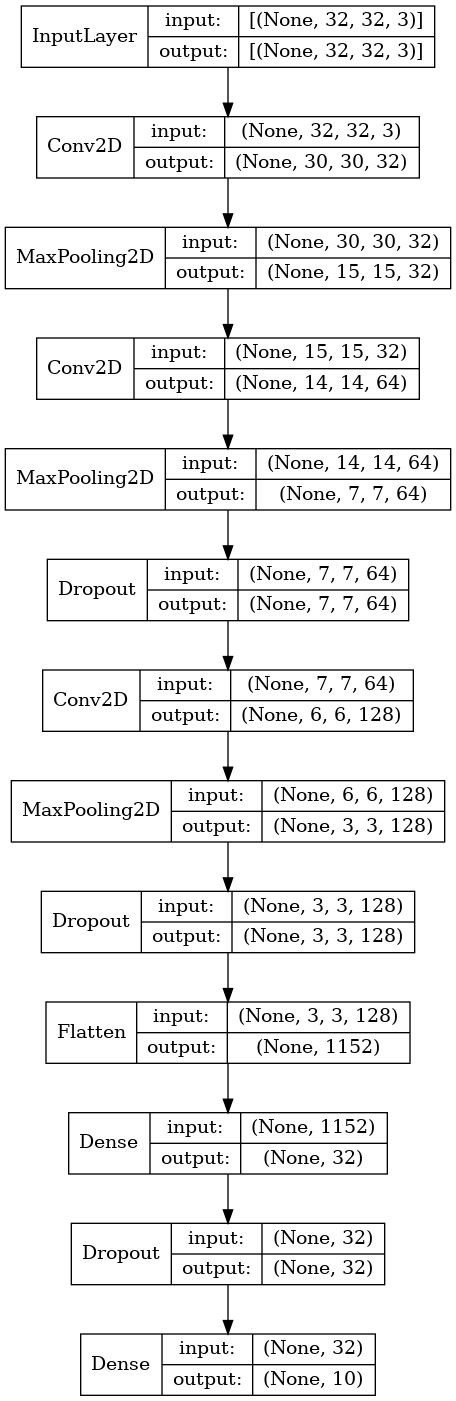

In [17]:
plot_model(model, show_shapes=True, show_layer_names=False)

# Siemese network

### From classification

In [18]:
model = tf.keras.models.load_model("siamese_vanilla_cifar10.h5")

In [20]:
results = full_evaluate_differencing(model, test_images, test_labels, siamese=True)

Accuracy: 0.9347099999999999
Confusion matrix:
 [[8672  336]
 [ 296  696]]
F1-score: 0.6877470355731226


### Custom

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow.keras.backend as K


def build_siamese_model(inputShape):
    inputs = Input(inputShape)

    x = Conv2D(32, (3, 3), activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(64, (3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

#     pooledOutput = GlobalAveragePooling2D()(x)
    pooledOutput = Flatten()(x)
    outputs = Dense(32)(pooledOutput)
    

    model = Model(inputs, outputs)

    return model


def euclidean_distance(vectors):
	# unpack the vectors into separate lists
	(featsA, featsB) = vectors

	# compute the sum of squared distances between the vectors
	sumSquared = K.sum(K.square(featsA - featsB), axis=1,
		keepdims=True)

	# return the euclidean distance between the vectors
	return K.sqrt(K.maximum(sumSquared, K.epsilon()))


In [22]:
y_tst = (test_labels == np.concatenate([test_labels[1:], test_labels[:1]])).reshape(-1)

### model on the whole datasets

learning

In [23]:
# model = build_siamese_vanilla_model(train_images[0].shape)

In [24]:
# adam = tf.keras.optimizers.Adam(
#     learning_rate=0.05,
# )

# model.compile(optimizer=adam,
#               loss='binary_crossentropy',
#               metrics=['accuracy', tf.keras.metrics.AUC()])

In [25]:
# a, b = 1, 2

# X1 = np.concatenate([train_images,train_images])
# X2 = np.concatenate([np.concatenate([train_images[a:], train_images[:a]]),
#                     np.concatenate([train_images[b:], train_images[:b]])])

# # y = to_categorical(y)


# y1 = (train_labels == np.concatenate([train_labels[a:], train_labels[:a]])).reshape(-1)
# y2 = (train_labels == np.concatenate([train_labels[b:], train_labels[:b]])).reshape(-1)
# y = np.concatenate([y1, y2])

In [26]:
# history = model.fit([X1, X2], y, epochs=500, batch_size=512, shuffle=True, class_weight={0:1, 1:2},
#          validation_data=([test_images, np.concatenate([test_images[1:], test_images[:1]])], y_tst))


In [27]:
# print_history_chart(history)

In [28]:
# model.save('siamese_vanilla_cifar10_diff.h5')

retrain

In [29]:
# !for i in {200..250}; do python retrain_cifar_10.py $i; done

evaluate

In [30]:
model = tf.keras.models.load_model("siamese_vanilla_cifar10_diff.h5")


In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 32)           109664      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model[0][0]                

In [32]:
y_pred = model.predict([test_images, np.concatenate([test_images[1:], test_images[:1]])])

In [33]:
accuracy_score(y_tst, y_pred>0.5)

0.93

In [34]:
confusion_matrix(y_tst, y_pred>0.5)

array([[8647,  361],
       [ 339,  653]])

In [35]:
f1_score(y_tst, y_pred>0.5)

0.6510468594217348

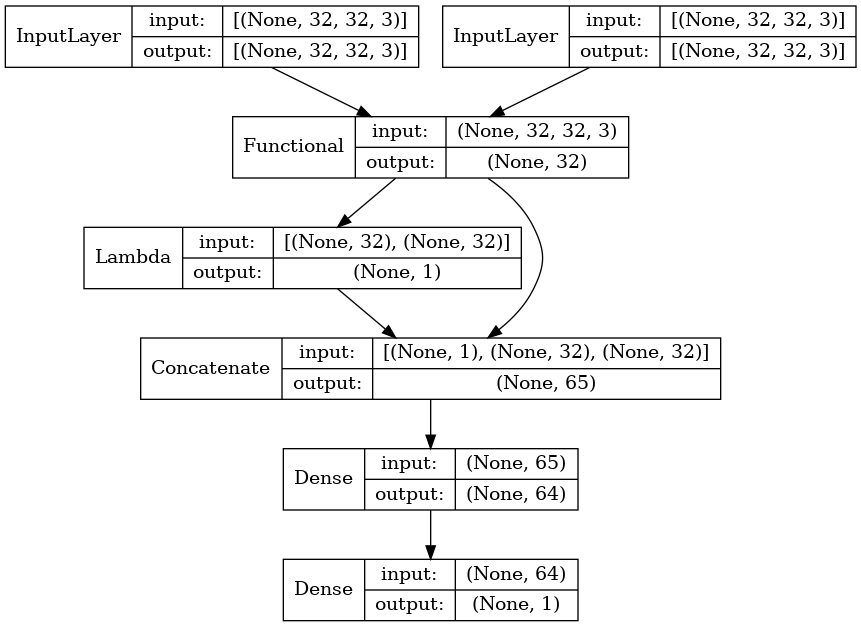

In [36]:
plot_model(model, show_shapes=True, show_layer_names=False)